In [1]:
import sys
import os
module_path = os.path.abspath('/media/jary/DATA/Uni/tesi/codice')

if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from networks import NoKafnet, Kafnet
import utils.datasetsUtils.MINST as MINST
from utils.datasetsUtils.taskManager import SingleTargetClassificationTask, NoTask
import configs.configClasses as configClasses
from torchvision.transforms import transforms
import torch
import networks.continual_learning as continual_learning
from Trainer import Trainer
import matplotlib.pyplot as plt
from collections import defaultdict
from copy import deepcopy
import numpy as np

In [3]:
torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(0)

In [4]:
print(torch.cuda.is_available())
print(torch.cuda.device_count())
print(torch.cuda.get_device_name(torch.cuda.current_device()))

True
1
GeForce GTX 1050


In [5]:
configOnline = configClasses.OnlineLearningConfig()
configOnline.L1_REG = 0
configOnline.EPOCHS = 20
configOnline.SAVE_PATH = './models/nokaf_vs_kaf'
configOnline.IS_CONVOLUTIONAL = False
configOnline.MODEL_NAME = ''
print(configOnline)

CONFIG PARAMETERS
BATCH_SIZE: 64
DEVICE: cuda
EPOCHS: 20
EWC_IMPORTANCE: 1000
EWC_SAMPLE_SIZE: 250
EWC_TYPE: <class 'networks.continual_learning.OnlineEWC'>
GAMMA: 1.0
IS_CONVOLUTIONAL: False
ITERS: 1
L1_REG: 0
LOSS: cross_entropy
LR: 0.001
MODEL_NAME: 
OPTIMIZER: SGD
RUN_NAME: default
SAVE_PATH: ./models/nokaf_vs_kaf
USE_EWC: True
USE_TENSORBOARD: True



In [6]:
dataset = MINST.PermutedMINST('../data/minst', download=True, n_permutation=4,
                        force_download=False, train_split=0.8, transform=None, target_transform=None)
dataset.load_dataset()

../data/minst/download
task #0 with train 56000 and test 14000 images (label: 0)
task #1 with train 56000 and test 14000 images (label: 1)
task #2 with train 56000 and test 14000 images (label: 2)
task #3 with train 56000 and test 14000 images (label: 3)


In [7]:
results = []

In [10]:
net = NoKafnet.MLP(len(dataset.class_to_idx))
kaf_net = Kafnet.KAFMLP(len(dataset.class_to_idx), hidden_size=int(400*0.7), kaf_init_fcn=None)

print('Numero di parametri rete classica: ', sum([torch.numel(p) for p in net.parameters()]))
print('Numero di parametri KAFNET: ', sum([torch.numel(p) for p in kaf_net.parameters()]))

Numero di parametri rete classica:  638810
Numero di parametri KAFNET:  396770


In [11]:
n = deepcopy(net)
config = deepcopy(configOnline)

config.MODEL_NAME = 'nokaf'

trainer = Trainer(n, deepcopy(dataset), config, save_modality=2)

r = trainer.load()
if not r:
    r = trainer.all_tasks()

results.append(('nokaf', r))

del trainer
del n

In [12]:
n = deepcopy(kaf_net)
config = deepcopy(configOnline)

config.MODEL_NAME = 'kaf'

trainer = Trainer(n, deepcopy(dataset), config, save_modality=2)

r = trainer.load()
if not r:
    r = trainer.all_tasks()

results.append(('kaf', r))

del trainer
del n

Training task (ewc) 0, epoch 1: 100%|██████████| 875/875 [00:08<00:00, 105.34it/s, loss=1.17, batch#=875]
Testing task 0: 219it [00:01, 193.17it/s, batch#=219]
Training task (ewc) 0, epoch 2: 100%|██████████| 875/875 [00:06<00:00, 131.06it/s, loss=0.498, batch#=875]
Testing task 0: 219it [00:01, 197.13it/s, batch#=219]
Training task (ewc) 0, epoch 3: 100%|██████████| 875/875 [00:06<00:00, 130.97it/s, loss=0.377, batch#=875]
Testing task 0: 219it [00:01, 196.24it/s, batch#=219]
Training task (ewc) 0, epoch 4: 100%|██████████| 875/875 [00:06<00:00, 129.74it/s, loss=0.325, batch#=875]
Testing task 0: 219it [00:01, 194.64it/s, batch#=219]
Training task (ewc) 0, epoch 5: 100%|██████████| 875/875 [00:06<00:00, 130.35it/s, loss=0.294, batch#=875]
Testing task 0: 219it [00:01, 195.97it/s, batch#=219]
Training task (ewc) 0, epoch 6: 100%|██████████| 875/875 [00:06<00:00, 130.68it/s, loss=0.27, batch#=875] 
Testing task 0: 219it [00:01, 196.44it/s, batch#=219]
Training task (ewc) 0, epoch 7: 100

Testing task 1: 219it [00:01, 194.80it/s, batch#=219]
Testing task 2: 219it [00:01, 193.97it/s, batch#=219]
Training task (ewc) 3, epoch 11: 100%|██████████| 875/875 [00:10<00:00, 87.03it/s, loss=1.07, batch#=875]
Testing task 3: 219it [00:01, 193.62it/s, batch#=219]
Testing task 0: 219it [00:01, 193.21it/s, batch#=219]
Testing task 1: 219it [00:01, 194.89it/s, batch#=219]
Testing task 2: 219it [00:01, 193.89it/s, batch#=219]
Training task (ewc) 3, epoch 12: 100%|██████████| 875/875 [00:10<00:00, 86.69it/s, loss=1.06, batch#=875]
Testing task 3: 219it [00:01, 198.82it/s, batch#=219]
Testing task 0: 219it [00:01, 198.93it/s, batch#=219]
Testing task 1: 219it [00:01, 192.75it/s, batch#=219]
Testing task 2: 219it [00:01, 191.92it/s, batch#=219]
Training task (ewc) 3, epoch 13: 100%|██████████| 875/875 [00:10<00:00, 86.85it/s, loss=1.04, batch#=875]
Testing task 3: 219it [00:01, 199.71it/s, batch#=219]
Testing task 0: 219it [00:01, 198.81it/s, batch#=219]
Testing task 1: 219it [00:01, 198.

In [13]:
print('RESULTS')
for name, r in results:
    print(name, r['metrics'])
    print()

RESULTS
nokaf {'fwt': 0.8633452380952381, 'bwt': -0.010559523809523816, 'remembering': 0.9894404761904761, 'pbwt': 0, 'accuracy': 0.41740714285714287}

kaf {'fwt': 0.9378333333333333, 'bwt': -0.01147619047619051, 'remembering': 0.9885238095238095, 'pbwt': 0, 'accuracy': 0.4165285714285714}



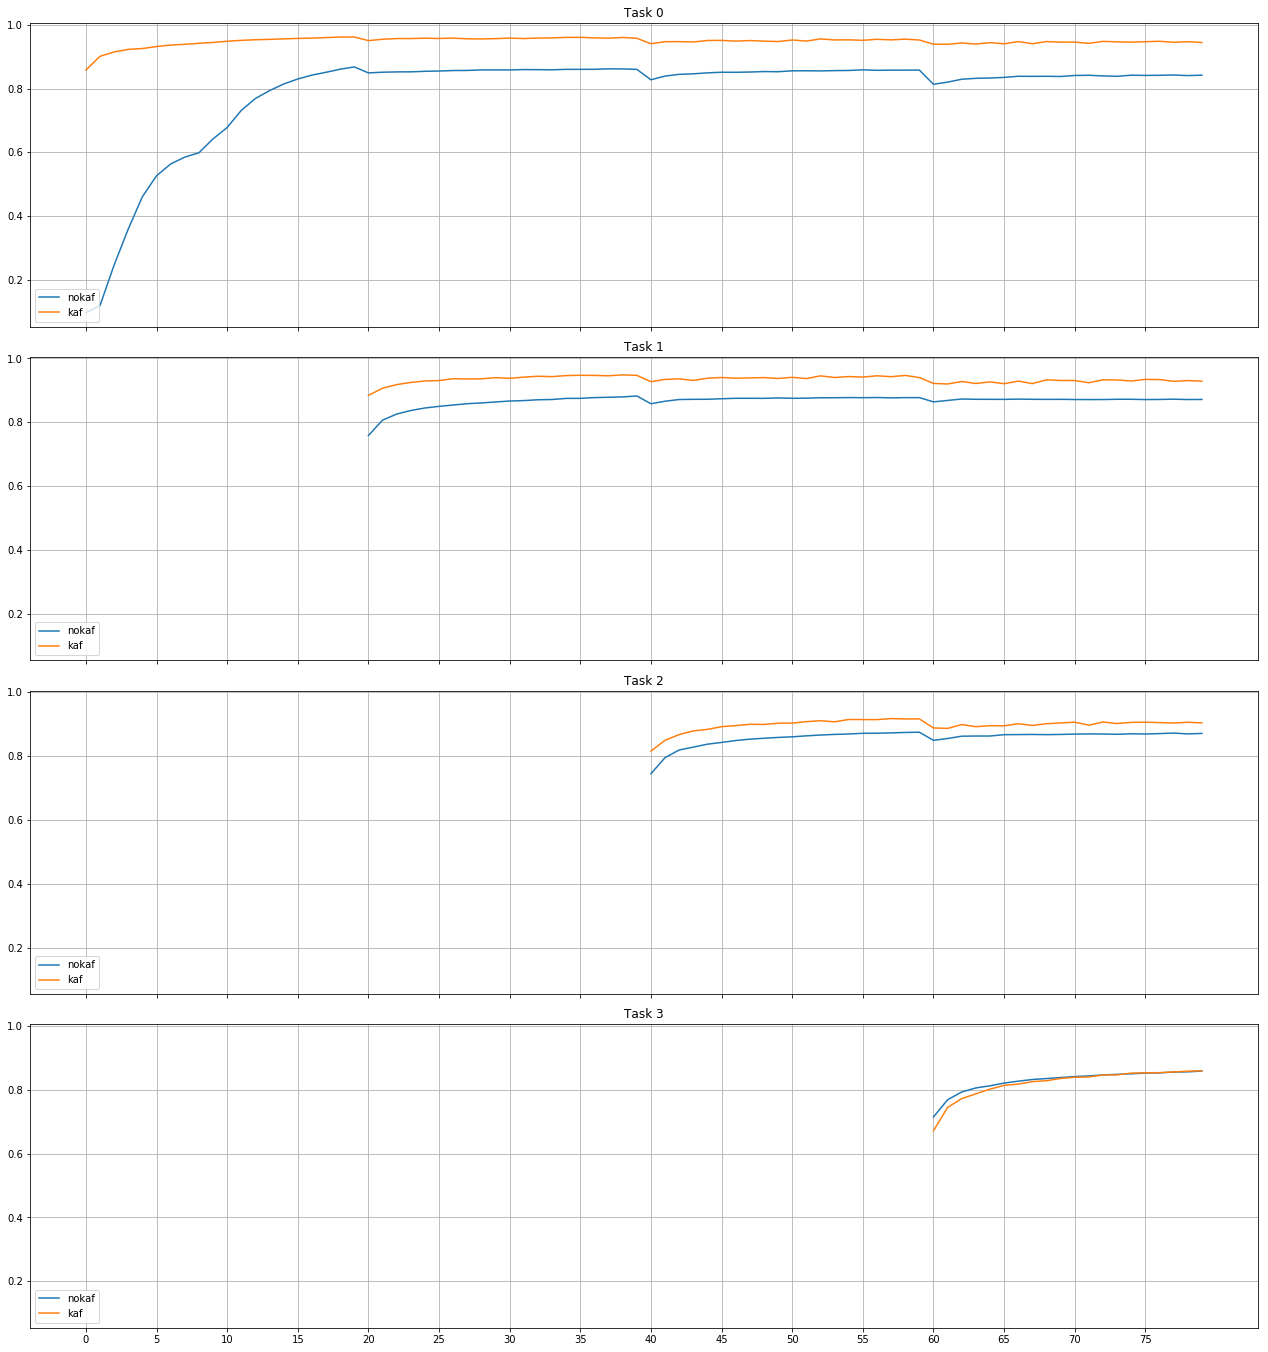

In [14]:
n_task = len(results[0][1]['tasks'])

tot_epochs = 0

for _, r in results:
    for k, v in r['tasks'].items():
        tot_epochs = max(tot_epochs, len(v['accuracy']))
      
fig, ax = plt.subplots(nrows=n_task, ncols=1, figsize=(22, 24), sharex=True, sharey=True)

for name, r in results:
    for i, task in enumerate(r['tasks'].keys()):

        com = r['tasks'][task]
        #no_ewt = metrics_no_ewt['tasks'][task]

        x = range(tot_epochs-len(com['accuracy']), tot_epochs)

        #ax = fig.add_subplot(n_task, 1, i+1, sharex=ax) 

        ax[i].plot(x, com['accuracy'], label=name)
        #ax.plot(x, no_ewt['accuracy'], label='online ewt')

        ax[i].set_xticks(range(0, tot_epochs, 5),minor=False)

        ax[i].set_title("Task {}".format(task))
        ax[i].legend(loc="lower left")
        ax[i].grid(True, axis='both')

        
fig.subplots_adjust(hspace=0.1, wspace=0.01)


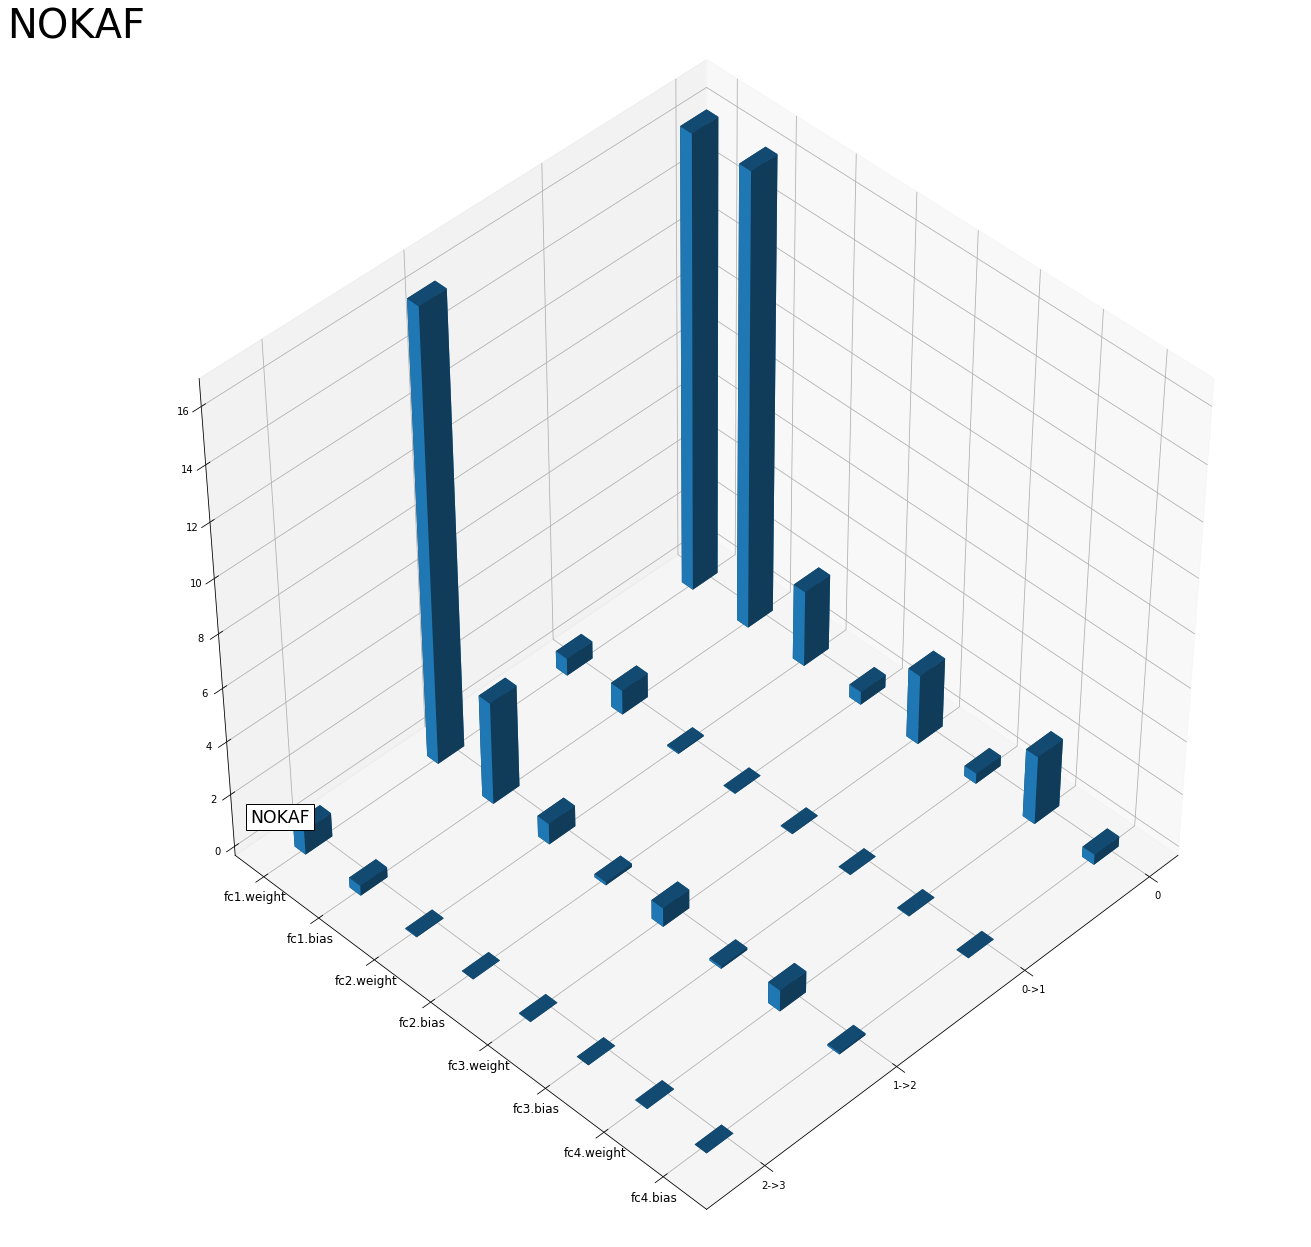

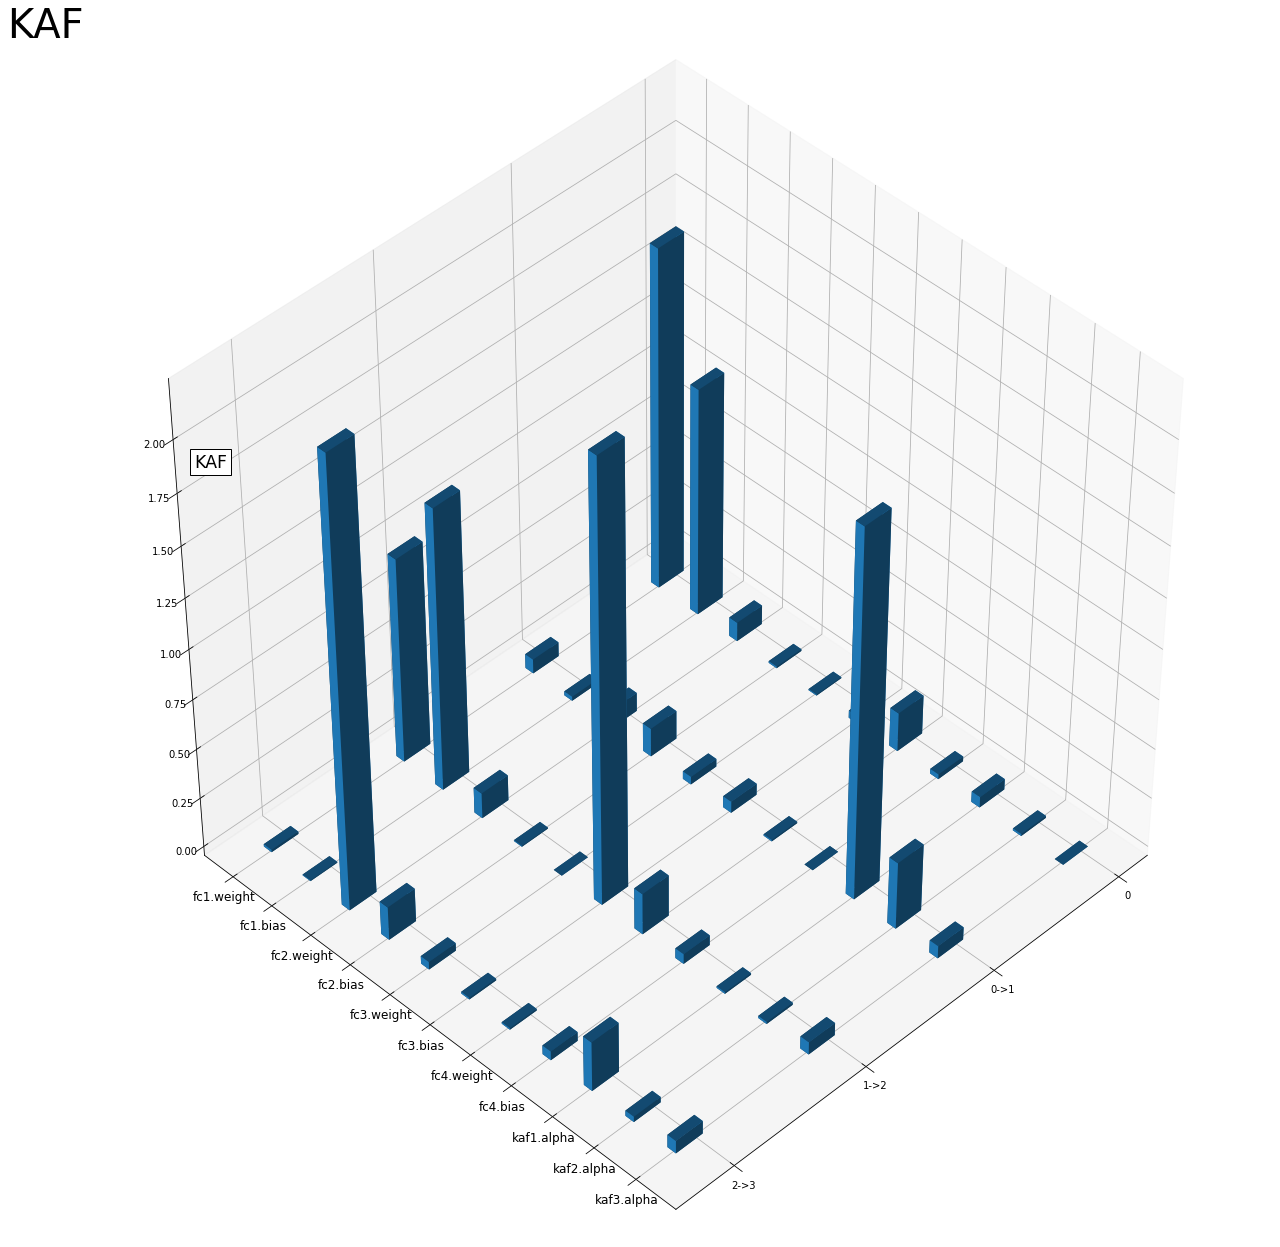

In [40]:
from mpl_toolkits.mplot3d import Axes3D

for name, _ in results:
    
    if name == 'kaf':
        local_net = kaf_net 
    else:
        local_net = net
        
    current_w = {n:p.cpu() for n, p in local_net.named_parameters() if p.requires_grad}

    x = np.arange(4)
    y = np.arange(len(current_w))
    
    xx, yy = np.meshgrid(x, y)
    z = np.zeros(shape=(len(x), len(y)))
    
    fig = plt.figure(figsize=(22, 22))
    ax = fig.add_subplot(111, projection='3d')
    
    x_labels = []
    
    for i in x:

        if i == 0:
            x_labels.append('0')
            
        else:
            x_labels.append('{}->{}'.format(i-1, i))
        
        
        n = deepcopy(local_net)
        config = deepcopy(configOnline)

        config.MODEL_NAME = name

        trainer = Trainer(n, deepcopy(dataset), config, save_modality=2)

        r = trainer.load(i)
        
        diff = {n: torch.dist(p.cpu(), current_w[n]) for n, p in trainer.model.named_parameters() if p.requires_grad }
        current_w = {n: p.cpu() for n, p in trainer.model.named_parameters() if p.requires_grad }
        
        for j, (_, d) in enumerate(diff.items()):
            z[i, j] = d
    

    z_n = z.flatten()

    ax.view_init(45, 45)
    
    ax.bar3d(xx.flatten(),
          yy.flatten(),
          np.zeros(len(z_n)),
          0.2, 0.2, z_n )
    
    ax.set_xticks(x)
    ax.set_xticklabels(x_labels)
    
    ax.set_yticks(y)
    ax.set_yticklabels(list(diff.keys()), fontdict={'fontsize':12})
    
#     ax.text(3.5, 0, 2, name.upper(), color='black',  fontsize='xx-large', 
#         bbox=dict(facecolor='white', edgecolor='black'))
    
    ax.set_title(name.upper(), fontdict={'fontsize':40}, loc='left', horizontalalignment='center')
    
    plt.show()

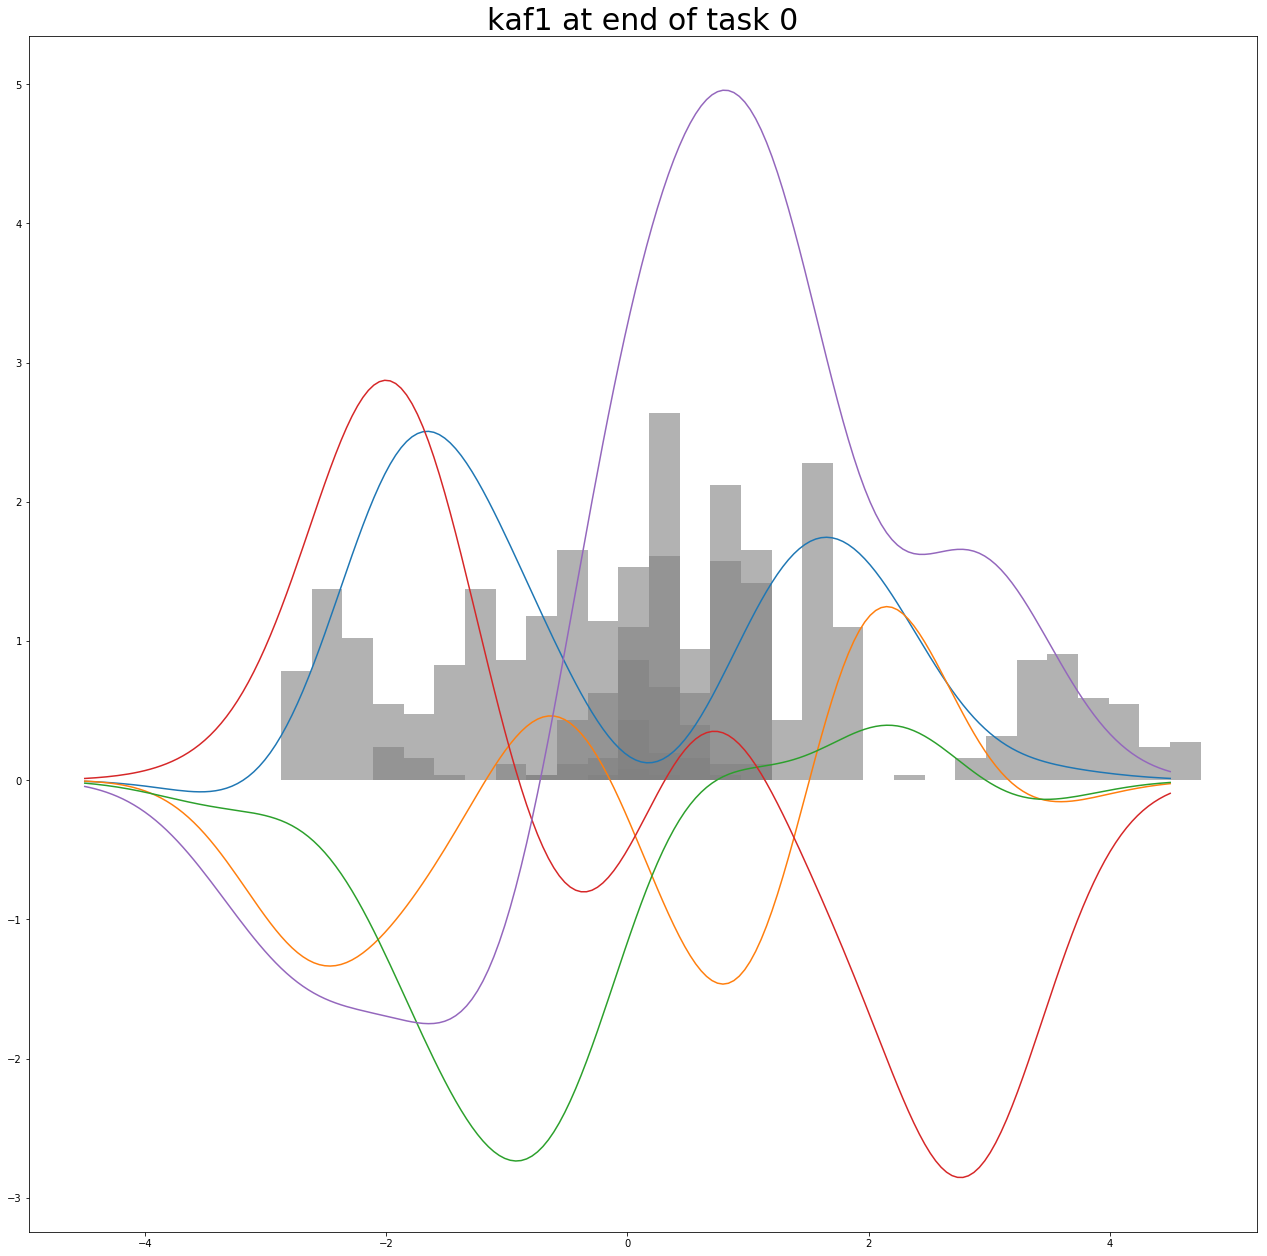

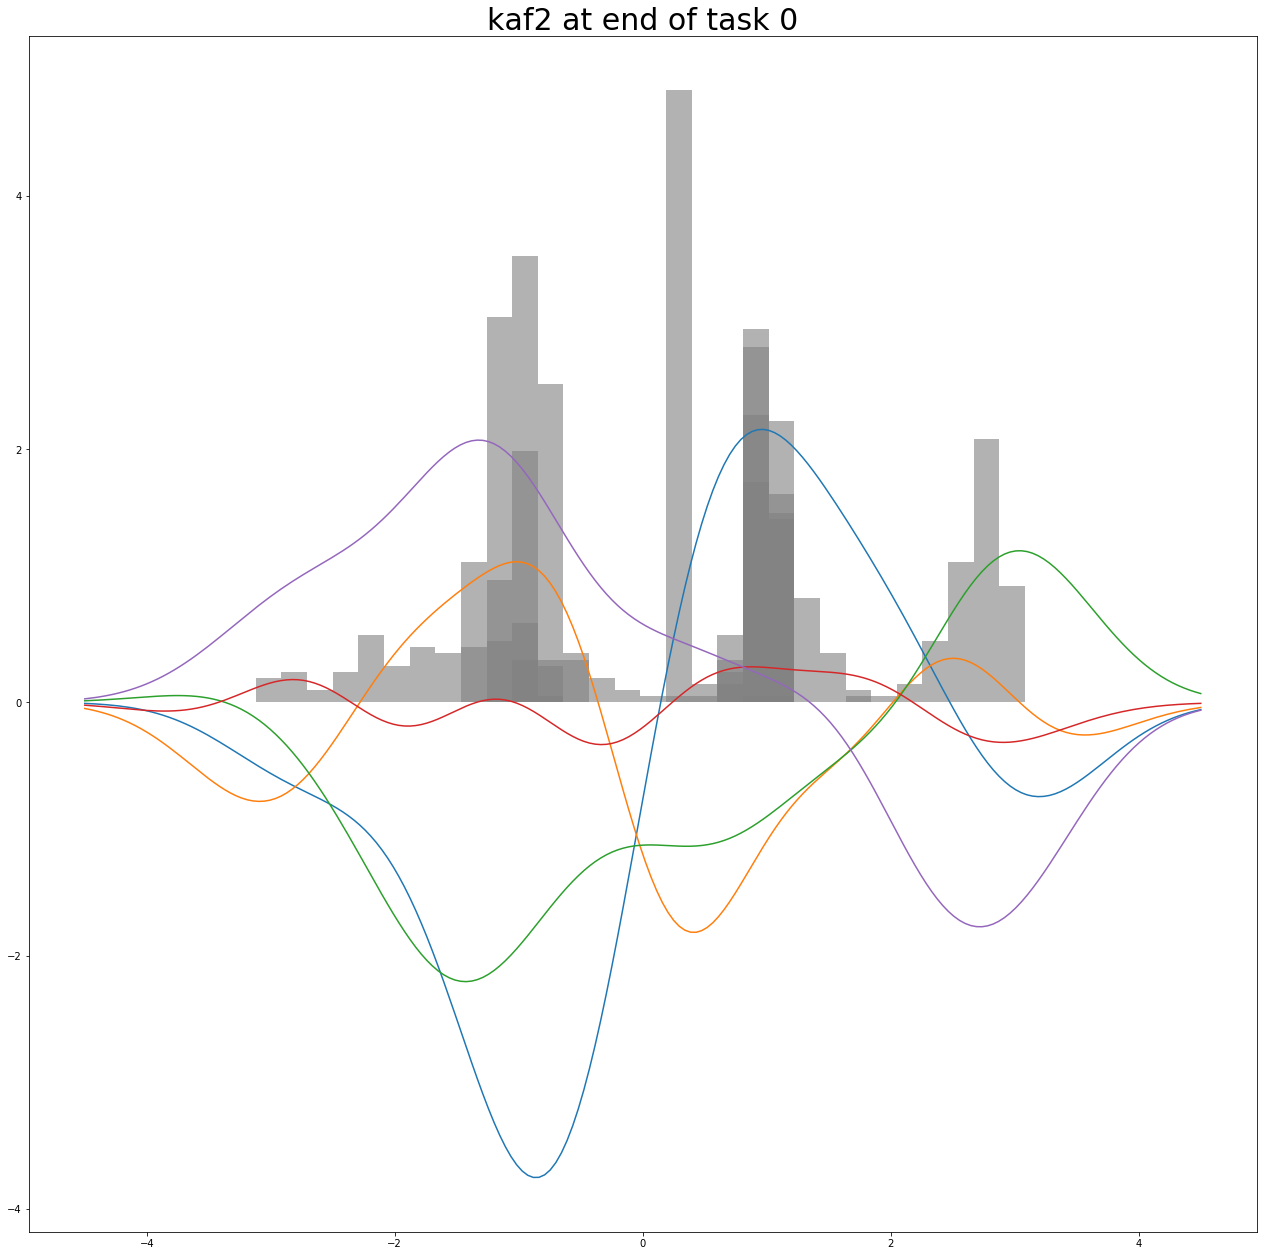

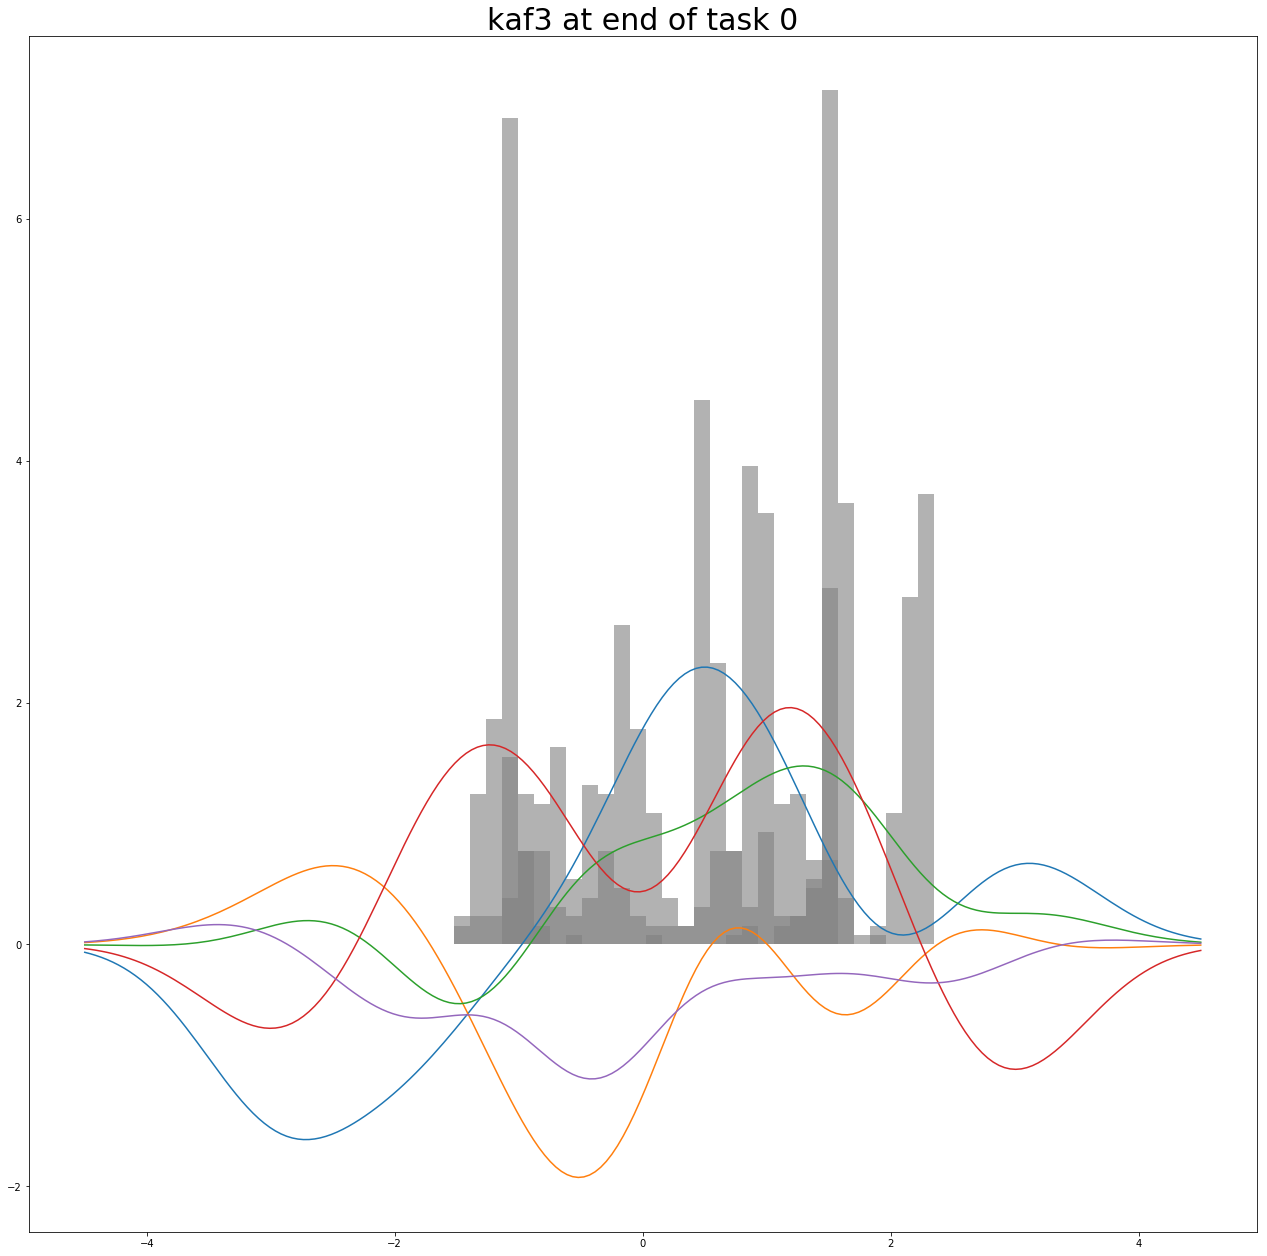

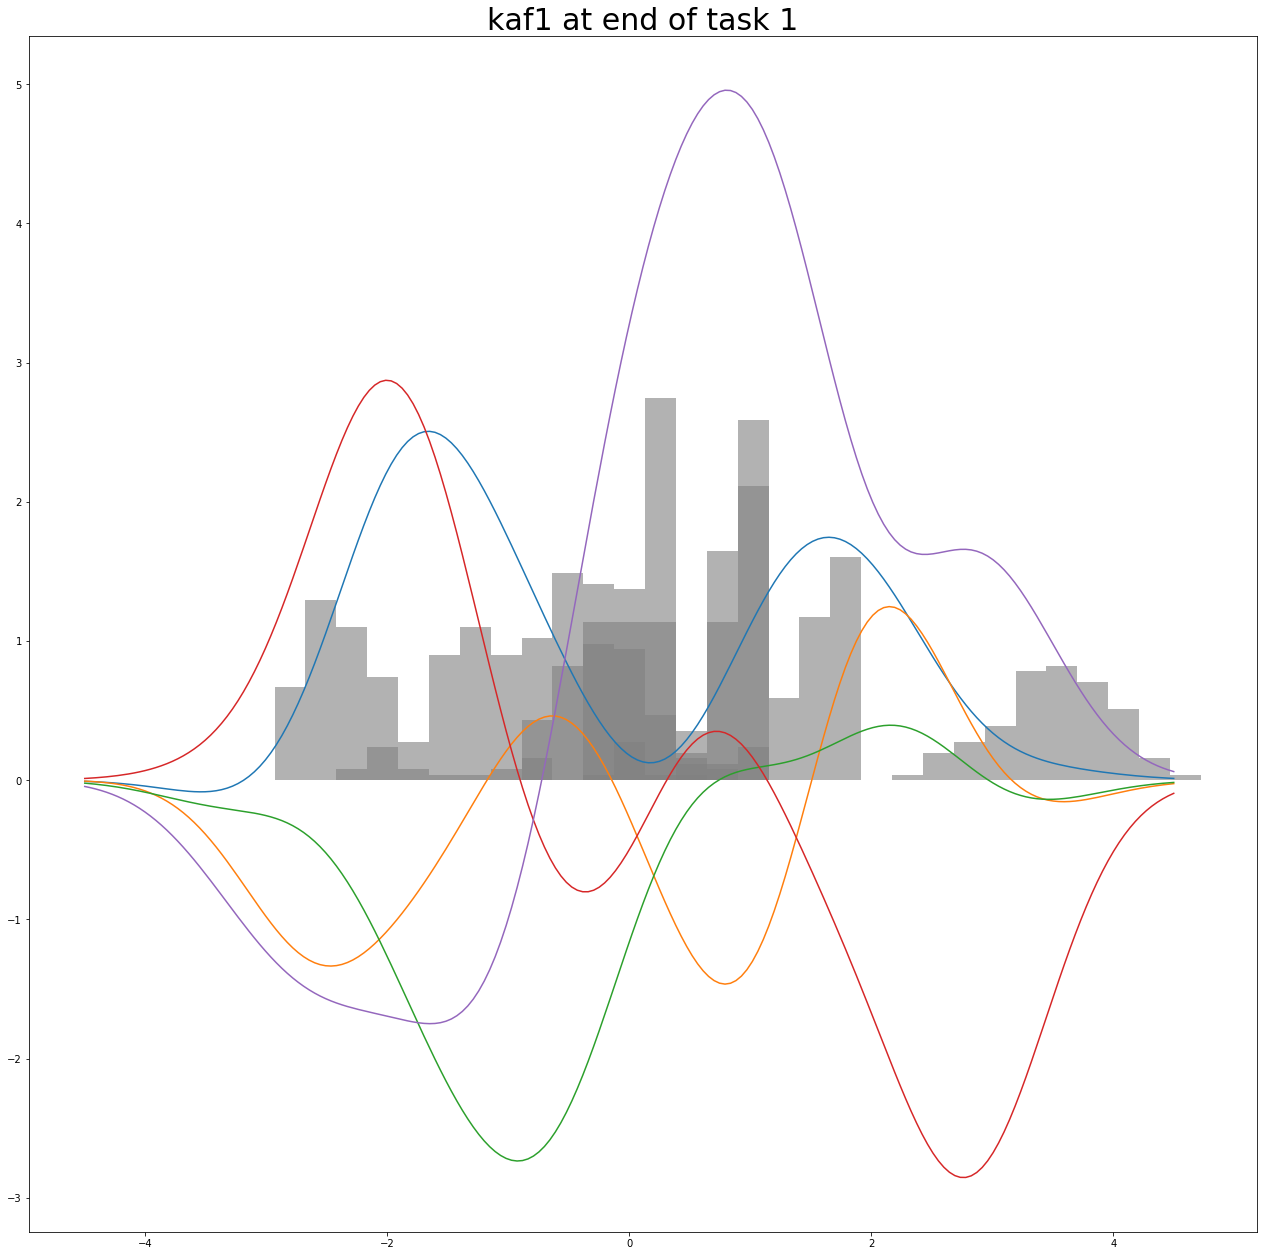

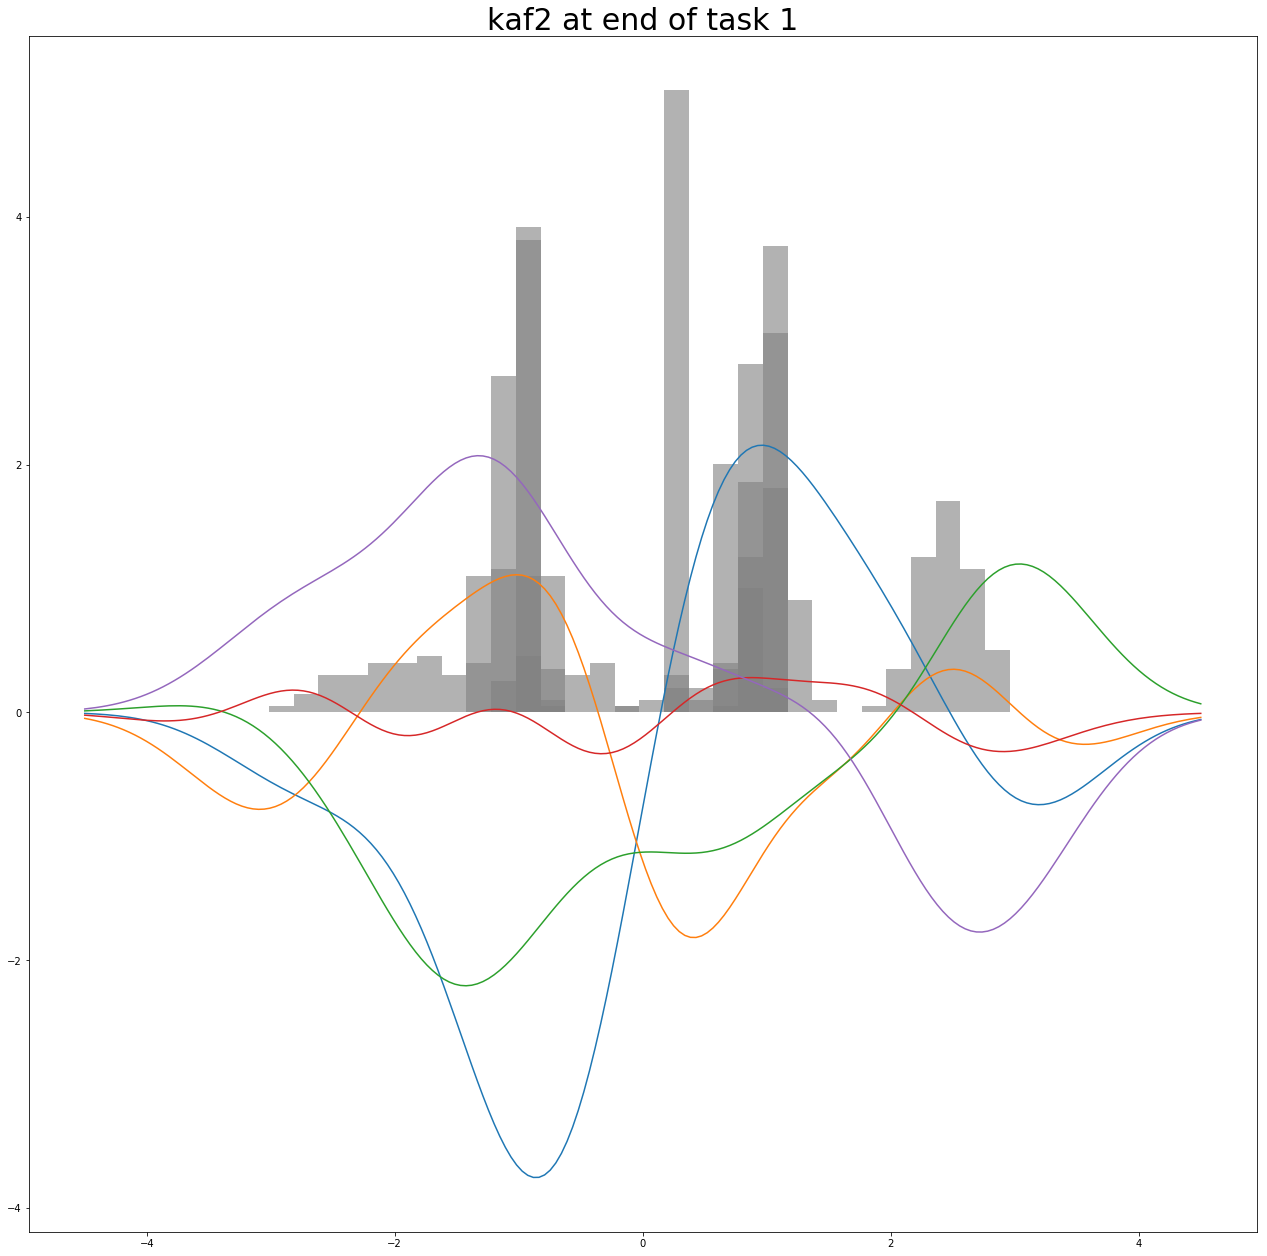

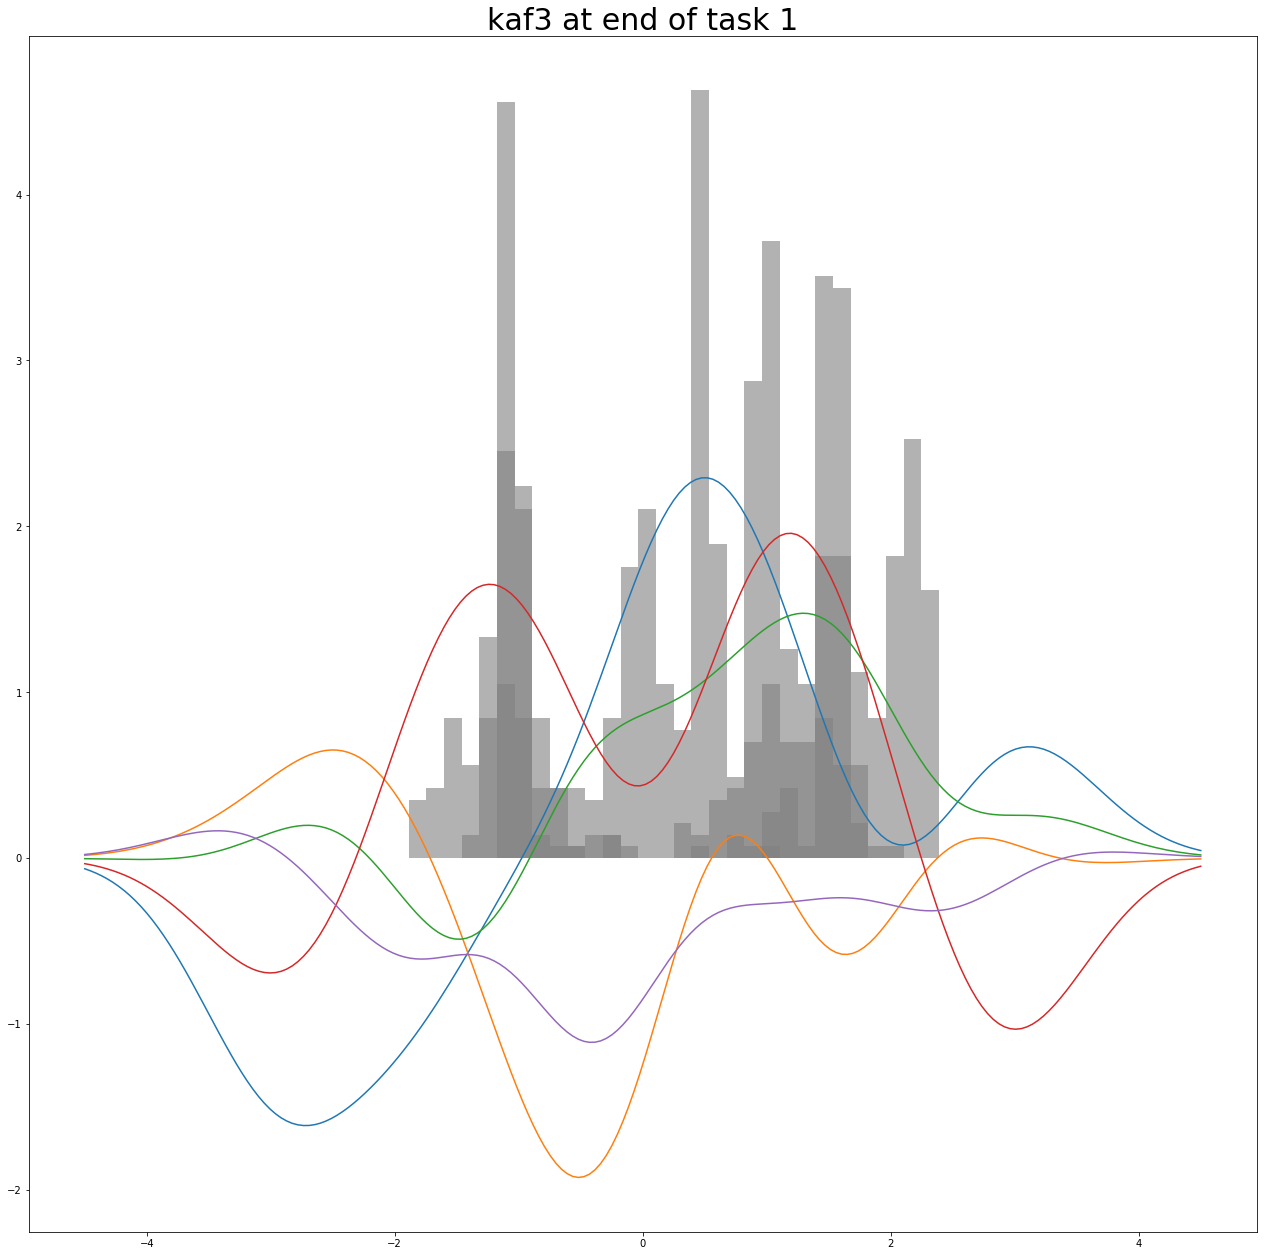

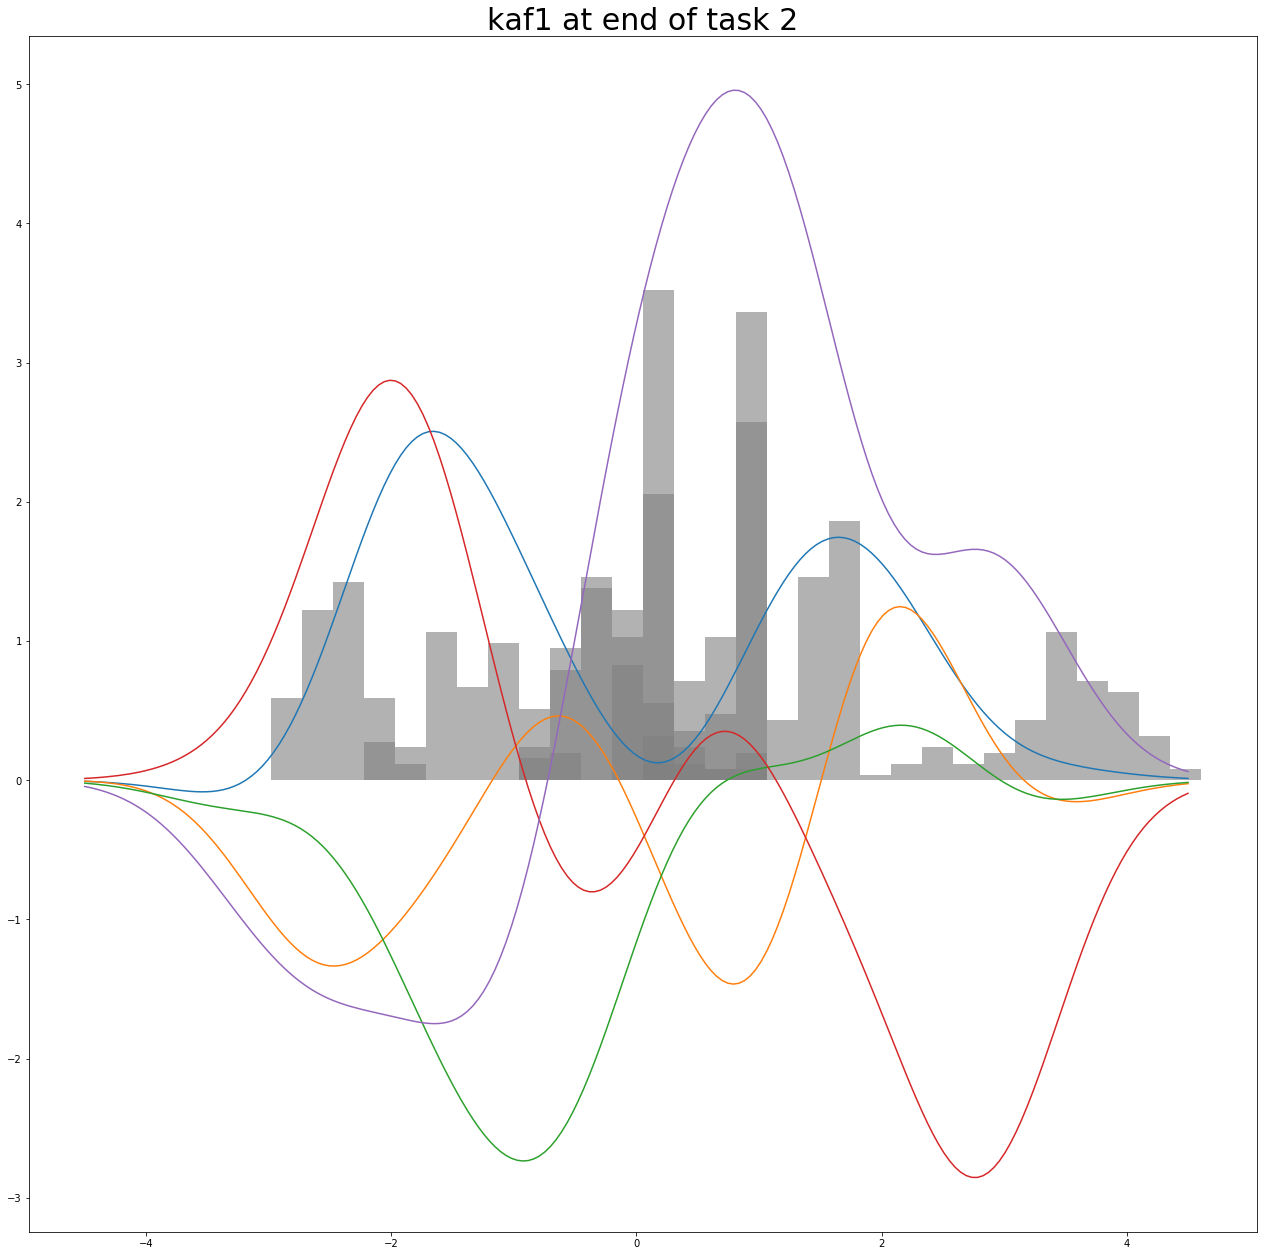

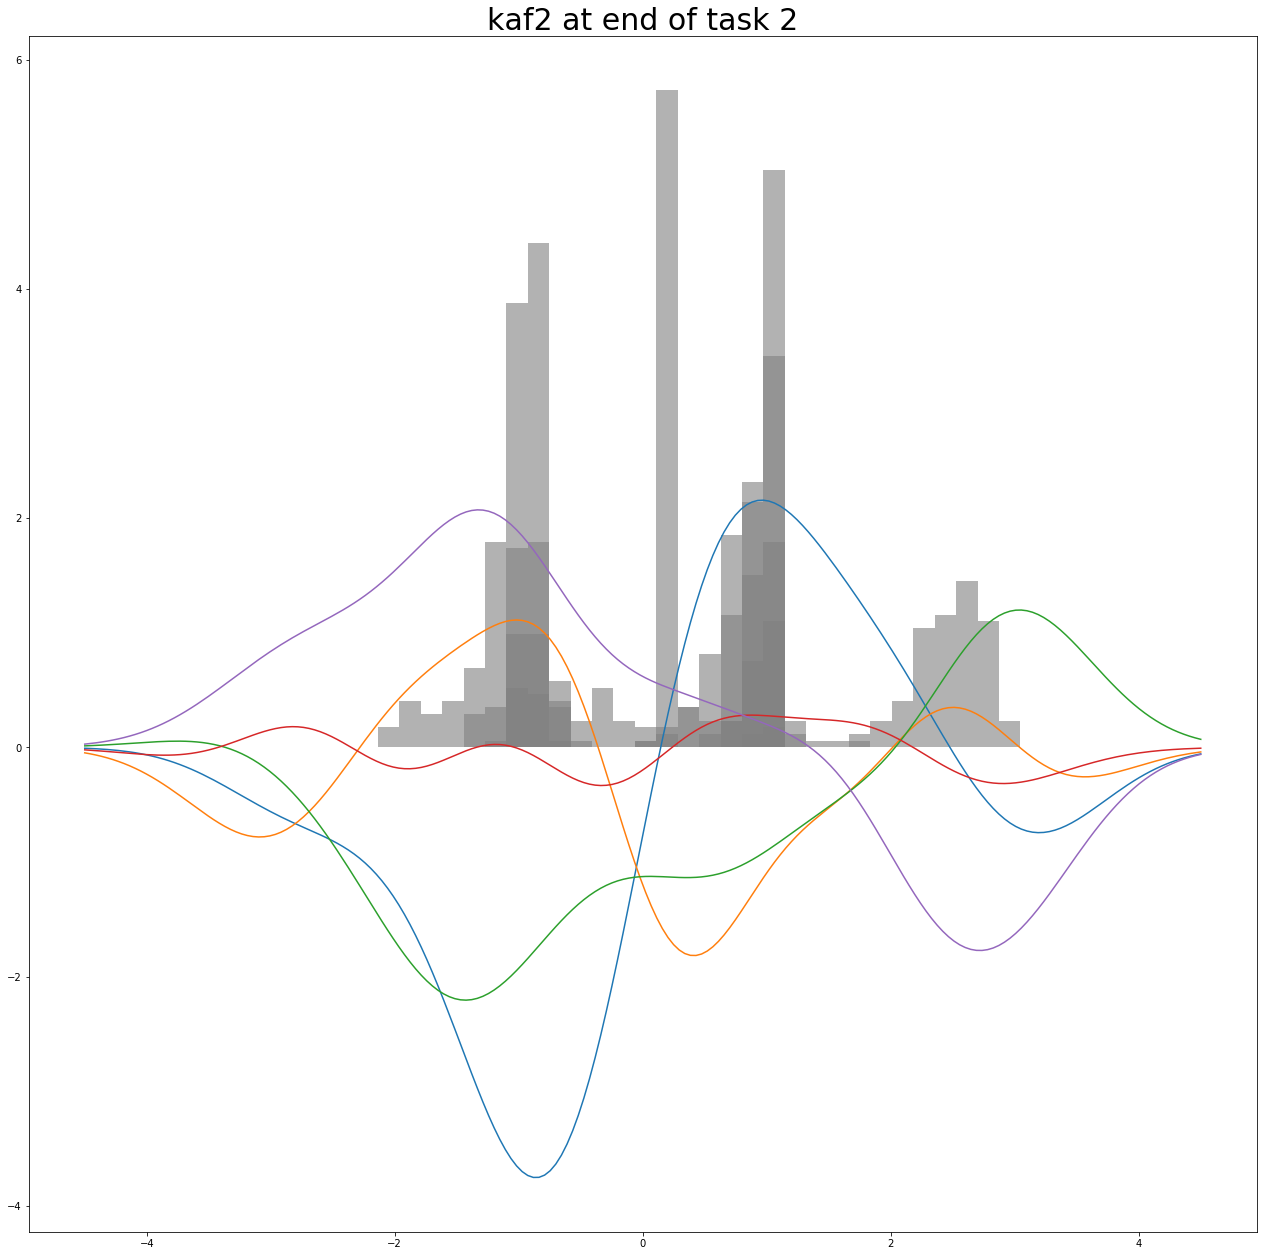

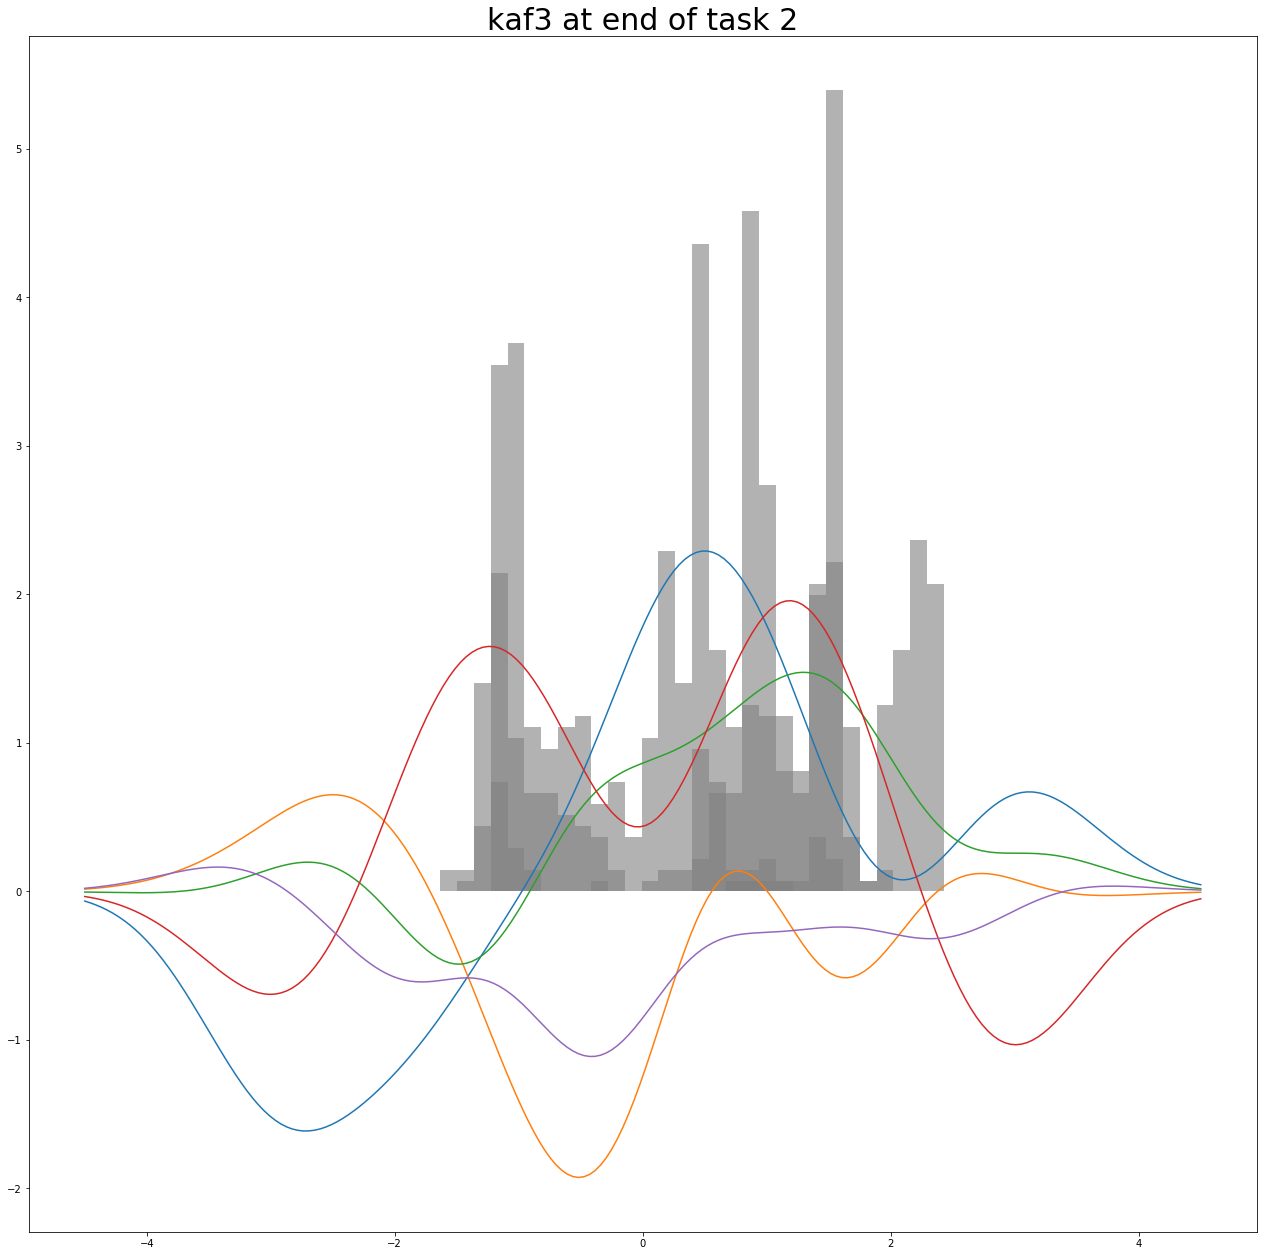

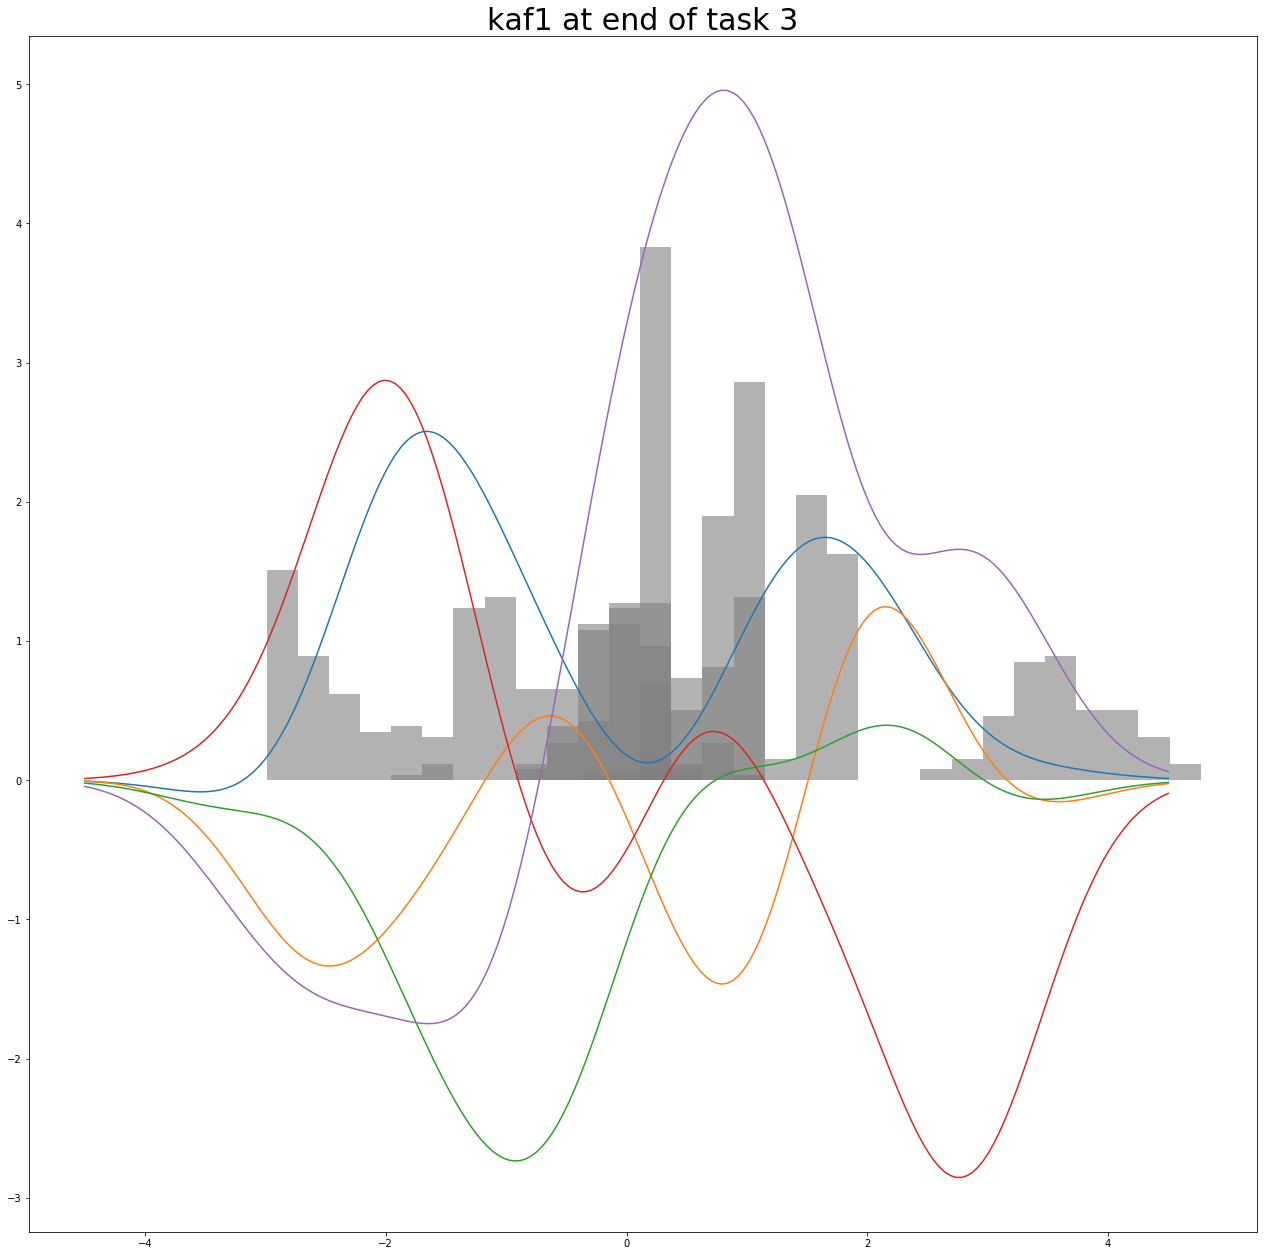

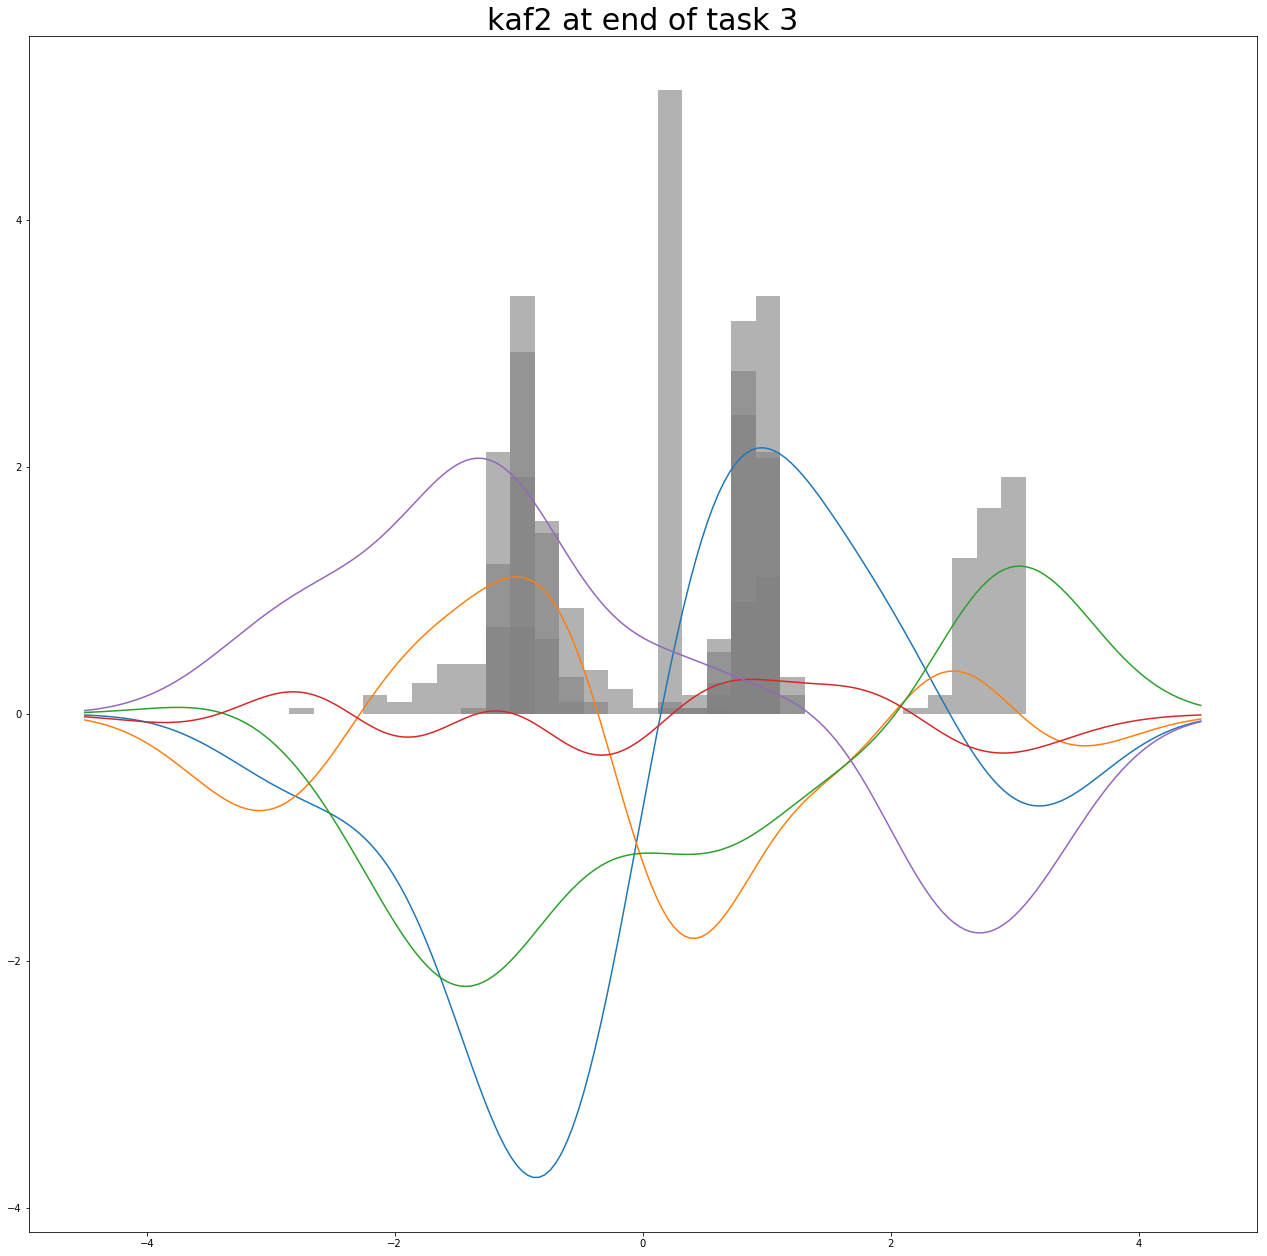

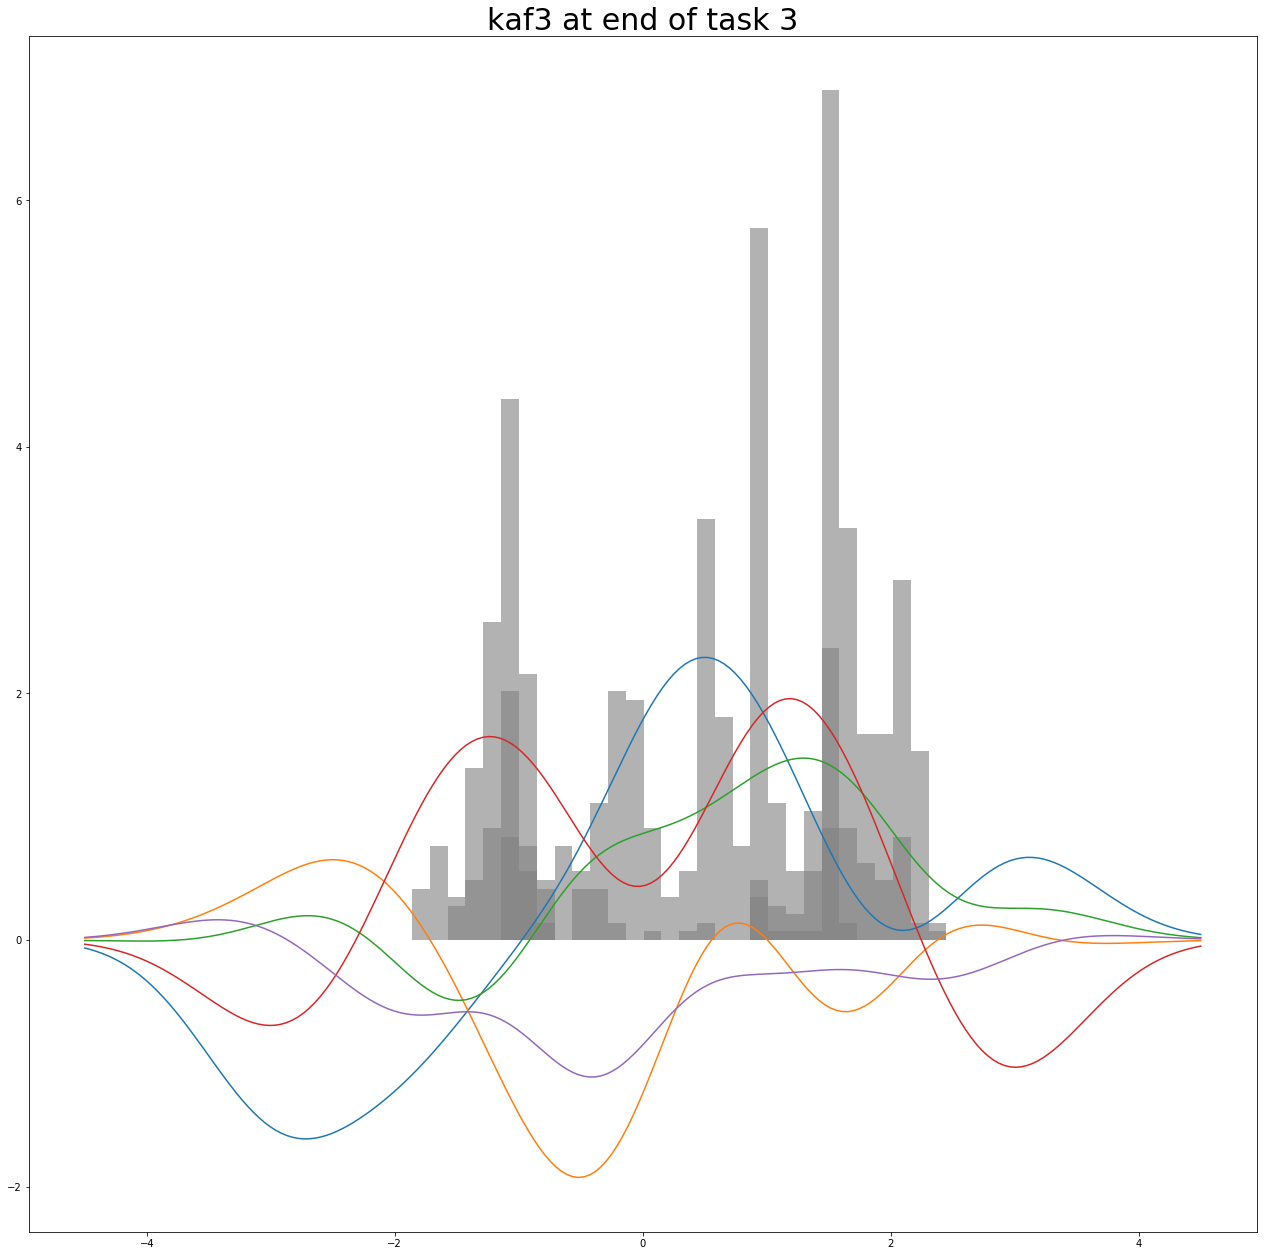

In [50]:
neurons = np.random.randint(low=1, high=int(400*0.7), size=10) 
from scipy.interpolate import make_interp_spline, BSpline

def hook(module, input, output):
    setattr(module, "_value_hook", output)

x = list(range(20))
common_params = {'histtype': 'step'}

# fig = plt.figure(figsize=(22, 22))
# ax = fig.add_subplot(111, projection='3d')

x_labels = []
space = np.linspace(-4.5, 4.5, 100)

for i in np.arange(4):

    n = deepcopy(kaf_net)
    config = deepcopy(configOnline)

    config.MODEL_NAME = name

    trainer = Trainer(n, deepcopy(dataset), config, save_modality=2)

    r = trainer.load(i)
    model = trainer.model.cpu()
        
    for _, m in model.named_modules():
        m.register_forward_hook(hook)
    
    dataset.task = i
    it = dataset.getIterator(1)
    
    imgs = []
    for _ in range(100):
        imgs.append(torch.Tensor(next(it)[0]))
        
    for l in [1, 2, 3]:
        name = 'kaf'+str(l)

        kaf = getattr(model, name)
        c = []

        for img in imgs:
            model(img)
            hooked_val = getattr(kaf, '_value_hook')[0].detach().cpu().numpy()
            c.append([hooked_val[n] for n in neurons])
            
        fig = plt.figure(figsize=(22, 22))
        ax = fig.add_subplot(111)
        ax.hist(x=np.asarray(c), histtype='stepfilled', density=True, alpha=0.6, color = ["grey"]*10, bins=30)
        ax.set_title('{} at end of task {}'.format(name, i), fontdict={'fontsize':30})
                  
        act_fun = []
        
        for j in space.astype(np.float32):
            input = torch.Tensor([j]).unsqueeze(0)
            res = kaf.forward(input).detach().cpu().numpy()[0]
            act_fun.append([res[n] for n in neurons[:5]])
    
        act_fun = np.asarray(act_fun)
        for j in range(act_fun.shape[1]):
            vals = act_fun[:, j]
            spl = make_interp_spline(space, vals, k=3)
            xnew = np.linspace(min(space), max(space), 200)
            ax.plot(xnew, spl(xnew))
        
        plt.show()
